In [1]:
# Packages for data processing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns 
sns.set()
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
#from lazypredict.Supervised import LazyRegressor
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('CS - Customer_churn.txt')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape #shape of the data 

(7043, 21)

In [5]:
df.nunique() #unique values

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
pd.DataFrame({"columns":df.isnull().sum()}) # checking null values

,columns
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [8]:
df[['gender','Churn']].value_counts()


gender  Churn
Male    No       2625
Female  No       2549
        Yes       939
Male    Yes       930
dtype: int64

In [9]:
df[['gender','SeniorCitizen']].value_counts()#bulk of our clients are not senior


gender  SeniorCitizen
Male    0                2981
Female  0                2920
Male    1                 574
Female  1                 568
dtype: int64

In [10]:
df[['gender','SeniorCitizen','Churn']].value_counts()


gender  SeniorCitizen  Churn
Male    0              No       2287
Female  0              No       2221
                       Yes       699
Male    0              Yes       694
        1              No        338
Female  1              No        328
                       Yes       240
Male    1              Yes       236
dtype: int64

In [11]:
df[['gender','Partner']].value_counts() #gender vs partner count


gender  Partner
Male    No         1841
Female  No         1800
Male    Yes        1714
Female  Yes        1688
dtype: int64

In [12]:
df[['gender','Partner','Churn']].value_counts() #gender vs partner vs churn


gender  Partner  Churn
Female  Yes      No       1369
Male    Yes      No       1364
        No       No       1261
Female  No       No       1180
                 Yes       620
Male    No       Yes       580
        Yes      Yes       350
Female  Yes      Yes       319
dtype: int64

In [13]:
df[['gender','SeniorCitizen','Partner','Churn']].value_counts() #gender vs senior citizen vs partner vs churn 
 

gender  SeniorCitizen  Partner  Churn
Female  0              Yes      No       1202
Male    0              Yes      No       1156
                       No       No       1131
Female  0              No       No       1019
                                Yes       461
Male    0              No       Yes       461
Female  0              Yes      Yes       238
Male    0              Yes      Yes       233
        1              Yes      No        208
Female  1              Yes      No        167
                       No       No        161
                                Yes       159
Male    1              No       No        130
                                Yes       119
                       Yes      Yes       117
Female  1              Yes      Yes        81
dtype: int64

In [14]:
df[['Dependents']].value_counts() #dependents count


Dependents
No            4933
Yes           2110
dtype: int64

In [15]:
df[['gender','Dependents']].value_counts() #gender vs dependents 


gender  Dependents
Male    No            2473
Female  No            2460
Male    Yes           1082
Female  Yes           1028
dtype: int64

In [16]:
df[['gender','SeniorCitizen','Dependents']].value_counts() #gender vs senior citizen vs dependents count


gender  SeniorCitizen  Dependents
Male    0              No            1948
Female  0              No            1934
Male    0              Yes           1033
Female  0              Yes            986
        1              No             526
Male    1              No             525
                       Yes             49
Female  1              Yes             42
dtype: int64

In [17]:
df[['gender','SeniorCitizen','Dependents','Churn']].value_counts() #gender vs senior citizen vs dependents vs churn count

gender  SeniorCitizen  Dependents  Churn
Male    0              No          No       1402
Female  0              No          No       1391
Male    0              Yes         No        885
Female  0              Yes         No        830
Male    0              No          Yes       546
Female  0              No          Yes       543
Male    1              No          No        302
Female  1              No          No        295
                                   Yes       231
Male    1              No          Yes       223
Female  0              Yes         Yes       156
Male    0              Yes         Yes       148
        1              Yes         No         36
Female  1              Yes         No         33
Male    1              Yes         Yes        13
Female  1              Yes         Yes         9
dtype: int64

In [18]:
df[['PhoneService']].value_counts() #phone service count

PhoneService
Yes             6361
No               682
dtype: int64

In [19]:
df[['gender','PhoneService']].value_counts() #gender vs phone service count

gender  PhoneService
Male    Yes             3204
Female  Yes             3157
Male    No               351
Female  No               331
dtype: int64

In [20]:
df[['MultipleLines']].value_counts() #multiple lines count

MultipleLines   
No                  3390
Yes                 2971
No phone service     682
dtype: int64

In [21]:
df[['gender','MultipleLines']].value_counts() #gender vs multiple lines count

gender  MultipleLines   
Male    No                  1719
Female  No                  1671
        Yes                 1486
Male    Yes                 1485
        No phone service     351
Female  No phone service     331
dtype: int64

In [22]:
df[['gender','Partner','MultipleLines']].value_counts() #gender vs partner vs multiple lines count

gender  Partner  MultipleLines   
Male    No       No                  1024
Female  No       No                   957
Male    Yes      Yes                  857
Female  Yes      Yes                  825
                 No                   714
Male    Yes      No                   695
Female  No       Yes                  661
Male    No       Yes                  628
                 No phone service     189
Female  No       No phone service     182
Male    Yes      No phone service     162
Female  Yes      No phone service     149
dtype: int64

In [23]:
df[['gender','Partner','MultipleLines','Churn']].value_counts() #gender & partner & multiple lines vs churn count 

gender  Partner  MultipleLines     Churn
Male    No       No                No       736
Female  Yes      Yes               No       657
Male    Yes      Yes               No       657
Female  No       No                No       636
        Yes      No                No       592
Male    Yes      No                No       577
Female  No       Yes               No       413
Male    No       Yes               No       394
Female  No       No                Yes      321
Male    No       No                Yes      288
Female  No       Yes               Yes      248
Male    No       Yes               Yes      234
        Yes      Yes               Yes      200
Female  Yes      Yes               Yes      168
        No       No phone service  No       131
Male    No       No phone service  No       131
        Yes      No phone service  No       130
Female  Yes      No                Yes      122
                 No phone service  No       120
Male    Yes      No                Yes      118

In [24]:
df[['InternetService']].value_counts() #internetService count

InternetService
Fiber optic        3096
DSL                2421
No                 1526
dtype: int64

In [25]:
df[['InternetService','gender']].value_counts() #internetService vs vs gender count

InternetService  gender
Fiber optic      Female    1553
                 Male      1543
DSL              Male      1233
                 Female    1188
No               Male       779
                 Female     747
dtype: int64

In [26]:
df[['OnlineSecurity']].value_counts() #online security count

OnlineSecurity     
No                     3498
Yes                    2019
No internet service    1526
dtype: int64

In [27]:
df[['OnlineBackup']].value_counts() #online backup count

OnlineBackup       
No                     3088
Yes                    2429
No internet service    1526
dtype: int64

In [28]:
df[['OnlineBackup','gender']].value_counts() #online backup vs gender 

OnlineBackup         gender
No                   Male      1573
                     Female    1515
Yes                  Female    1226
                     Male      1203
No internet service  Male       779
                     Female     747
dtype: int64

In [29]:
df[['OnlineBackup','gender','Churn']].value_counts() #online backup vs gender vs churn count

OnlineBackup         gender  Churn
Yes                  Female  No       961
No                   Male    No       958
Yes                  Male    No       945
No                   Female  No       897
No internet service  Male    No       722
                     Female  No       691
No                   Female  Yes      618
                     Male    Yes      615
Yes                  Female  Yes      265
                     Male    Yes      258
No internet service  Male    Yes       57
                     Female  Yes       56
dtype: int64

In [30]:
df[['DeviceProtection']].value_counts() #device protection count

DeviceProtection   
No                     3095
Yes                    2422
No internet service    1526
dtype: int64

In [31]:
df[['DeviceProtection','gender']].value_counts() # device protection vs gender count

DeviceProtection     gender
No                   Male      1557
                     Female    1538
Yes                  Male      1219
                     Female    1203
No internet service  Male       779
                     Female     747
dtype: int64

In [32]:
df[['DeviceProtection','gender','Churn']].value_counts() #device protection vs gender vs churn count

DeviceProtection     gender  Churn
No                   Male    No       962
Yes                  Male    No       941
                     Female  No       936
No                   Female  No       922
No internet service  Male    No       722
                     Female  No       691
No                   Female  Yes      616
                     Male    Yes      595
Yes                  Male    Yes      278
                     Female  Yes      267
No internet service  Male    Yes       57
                     Female  Yes       56
dtype: int64

In [33]:
df[['TechSupport']].value_counts() # techSupport count

TechSupport        
No                     3473
Yes                    2044
No internet service    1526
dtype: int64

In [34]:
df[['TechSupport','gender']].value_counts() #techsupport vs gender 

TechSupport          gender
No                   Male      1759
                     Female    1714
Yes                  Female    1027
                     Male      1017
No internet service  Male       779
                     Female     747
dtype: int64

In [35]:
df[['TechSupport','gender','Churn']].value_counts() #techsupport vs gender vs churn count

TechSupport          gender  Churn
No                   Male    No       1031
                     Female  No        996
Yes                  Male    No        872
                     Female  No        862
No                   Male    Yes       728
No internet service  Male    No        722
No                   Female  Yes       718
No internet service  Female  No        691
Yes                  Female  Yes       165
                     Male    Yes       145
No internet service  Male    Yes        57
                     Female  Yes        56
dtype: int64

In [36]:
df[['StreamingTV']].value_counts() #Streaming TV count

StreamingTV        
No                     2810
Yes                    2707
No internet service    1526
dtype: int64

In [37]:
df[['StreamingTV','gender']].value_counts() #StreamingTV vs gender count


StreamingTV          gender
No                   Male      1424
                     Female    1386
Yes                  Female    1355
                     Male      1352
No internet service  Male       779
                     Female     747
dtype: int64

In [38]:
df[['StreamingTV','Churn']].value_counts() #Streaming TV vs churn count

StreamingTV          Churn
Yes                  No       1893
No                   No       1868
No internet service  No       1413
No                   Yes       942
Yes                  Yes       814
No internet service  Yes       113
dtype: int64

In [39]:
df[['StreamingMovies']].value_counts() #StreamingMovies

StreamingMovies    
No                     2785
Yes                    2732
No internet service    1526
dtype: int64

In [40]:
df[['StreamingMovies','gender']].value_counts() #StreamingMovies vs gender

StreamingMovies      gender
No                   Male      1415
Yes                  Female    1371
No                   Female    1370
Yes                  Male      1361
No internet service  Male       779
                     Female     747
dtype: int64

In [41]:
df[['StreamingMovies','gender','Churn']].value_counts() #StreamingMovies vs gender vs churn count

StreamingMovies      gender  Churn
Yes                  Female  No       964
No                   Male    No       953
Yes                  Male    No       950
No                   Female  No       894
No internet service  Male    No       722
                     Female  No       691
No                   Female  Yes      476
                     Male    Yes      462
Yes                  Male    Yes      411
                     Female  Yes      407
No internet service  Male    Yes       57
                     Female  Yes       56
dtype: int64

In [42]:
df[['Contract']].value_counts() #Contract count

Contract      
Month-to-month    3875
Two year          1695
One year          1473
dtype: int64

In [43]:
df[['Contract','gender']].value_counts() #contract vs gender count

Contract        gender
Month-to-month  Male      1950
                Female    1925
Two year        Male       850
                Female     845
One year        Male       755
                Female     718
dtype: int64

In [44]:
df[['Contract','gender','Churn']].value_counts() #contract vs gender vs churn count

Contract        gender  Churn
Month-to-month  Male    No       1137
                Female  No       1083
                        Yes       842
Two year        Male    No        824
                Female  No        823
Month-to-month  Male    Yes       813
One year        Male    No        664
                Female  No        643
                Male    Yes        91
                Female  Yes        75
Two year        Male    Yes        26
                Female  Yes        22
dtype: int64

In [45]:
df[['PaperlessBilling']].value_counts() #PaperlessBilling count

PaperlessBilling
Yes                 4171
No                  2872
dtype: int64

In [46]:
df[['PaperlessBilling','gender']].value_counts() #paperlessbillin vs gender count

PaperlessBilling  gender
Yes               Female    2086
                  Male      2085
No                Male      1470
                  Female    1402
dtype: int64

In [47]:
df[['PaymentMethod']].value_counts() #PaymentMethod count

PaymentMethod            
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
dtype: int64

In [48]:
df[['PaymentMethod','gender']].value_counts() #paymentmethod vs gender count

PaymentMethod              gender
Electronic check           Male      1195
                           Female    1170
Mailed check               Male       834
Bank transfer (automatic)  Female     788
Mailed check               Female     778
Credit card (automatic)    Male       770
Bank transfer (automatic)  Male       756
Credit card (automatic)    Female     752
dtype: int64

In [49]:
df[['MonthlyCharges']].value_counts() #monthly charges count

MonthlyCharges
20.05             61
19.85             45
19.95             44
19.90             44
19.70             43
                  ..
67.60              1
67.65              1
67.70              1
67.75              1
118.75             1
Length: 1585, dtype: int64

In [50]:
df[['MonthlyCharges']].mean() #Monthly charges count

MonthlyCharges    64.761692
dtype: float64

In [51]:
df[['MonthlyCharges']].median() #monthly charges count

MonthlyCharges    70.35
dtype: float64

In [52]:
df[['TotalCharges']].value_counts() #total charges count

TotalCharges
                11
20.2            11
19.75            9
20.05            8
19.9             8
                ..
260.8            1
260.7            1
2599.95          1
2598.95          1
999.9            1
Length: 6531, dtype: int64

In [53]:
df['TotalCharges'] #total charges 

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [54]:
df["Count"] = 1

fig = px.treemap(df, path=['Churn','gender','Contract','PaymentMethod'], values='Count',color ='Churn'
                 )
fig.update_layout(title = " Churn Distribution ",title_x=0.5,
                 )
fig.show()

In [55]:
df_gender_=df.groupby(by =['gender','Churn'])['tenure'].count().to_frame().reset_index().rename(columns={'gender':'Gender','Response':'Response','tenure':'Count'})
df_gender_['Churn']=df_gender_['Churn'].astype('category')

fig = px.bar(df_gender_, x="Gender", y="Count",color="Churn",barmode="group",
             
             )
fig.update_layout(title_text='Gender With Customer Churn',title_x=0.5)
fig.show()

In [56]:
df['tenure_month_group']=np.where((df['tenure']<3),"< 3 months",
                                 np.where((df['tenure']>2)&(df['tenure']<=6),"3-6 months",
                                   np.where((df['tenure']>6)&(df['tenure']<=12),"7-12 months",
                                            np.where((df['tenure']>12)&(df['tenure']<=24),"13-24 months",
                                        np.where((df['tenure']>24)&(df['tenure']<=60),"25-60 months",
                                                np.where(df['tenure']>60,"Above 60 months","NULL"))))))

In [57]:
df_months=df.groupby(by =['tenure_month_group','Churn'])['TotalCharges'].count().to_frame().reset_index()



fig = px.bar(df_months, x='tenure_month_group', y='TotalCharges',color="Churn",barmode="group",
             
             )
fig.update_layout(title_text='Customer Churn  by Month Group',title_x=0.5)
fig.show()

In [58]:
df_ch=df['Churn'].value_counts().to_frame().reset_index().rename(columns={'index':'Churn','Churn':'count'})
fig = go.Figure([go.Pie(labels=df_ch['Churn'], values=df_ch['count'],hole=0.2)])



fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')



fig.update_layout(title="Customer Churn",title_x=0.5)
fig.show()

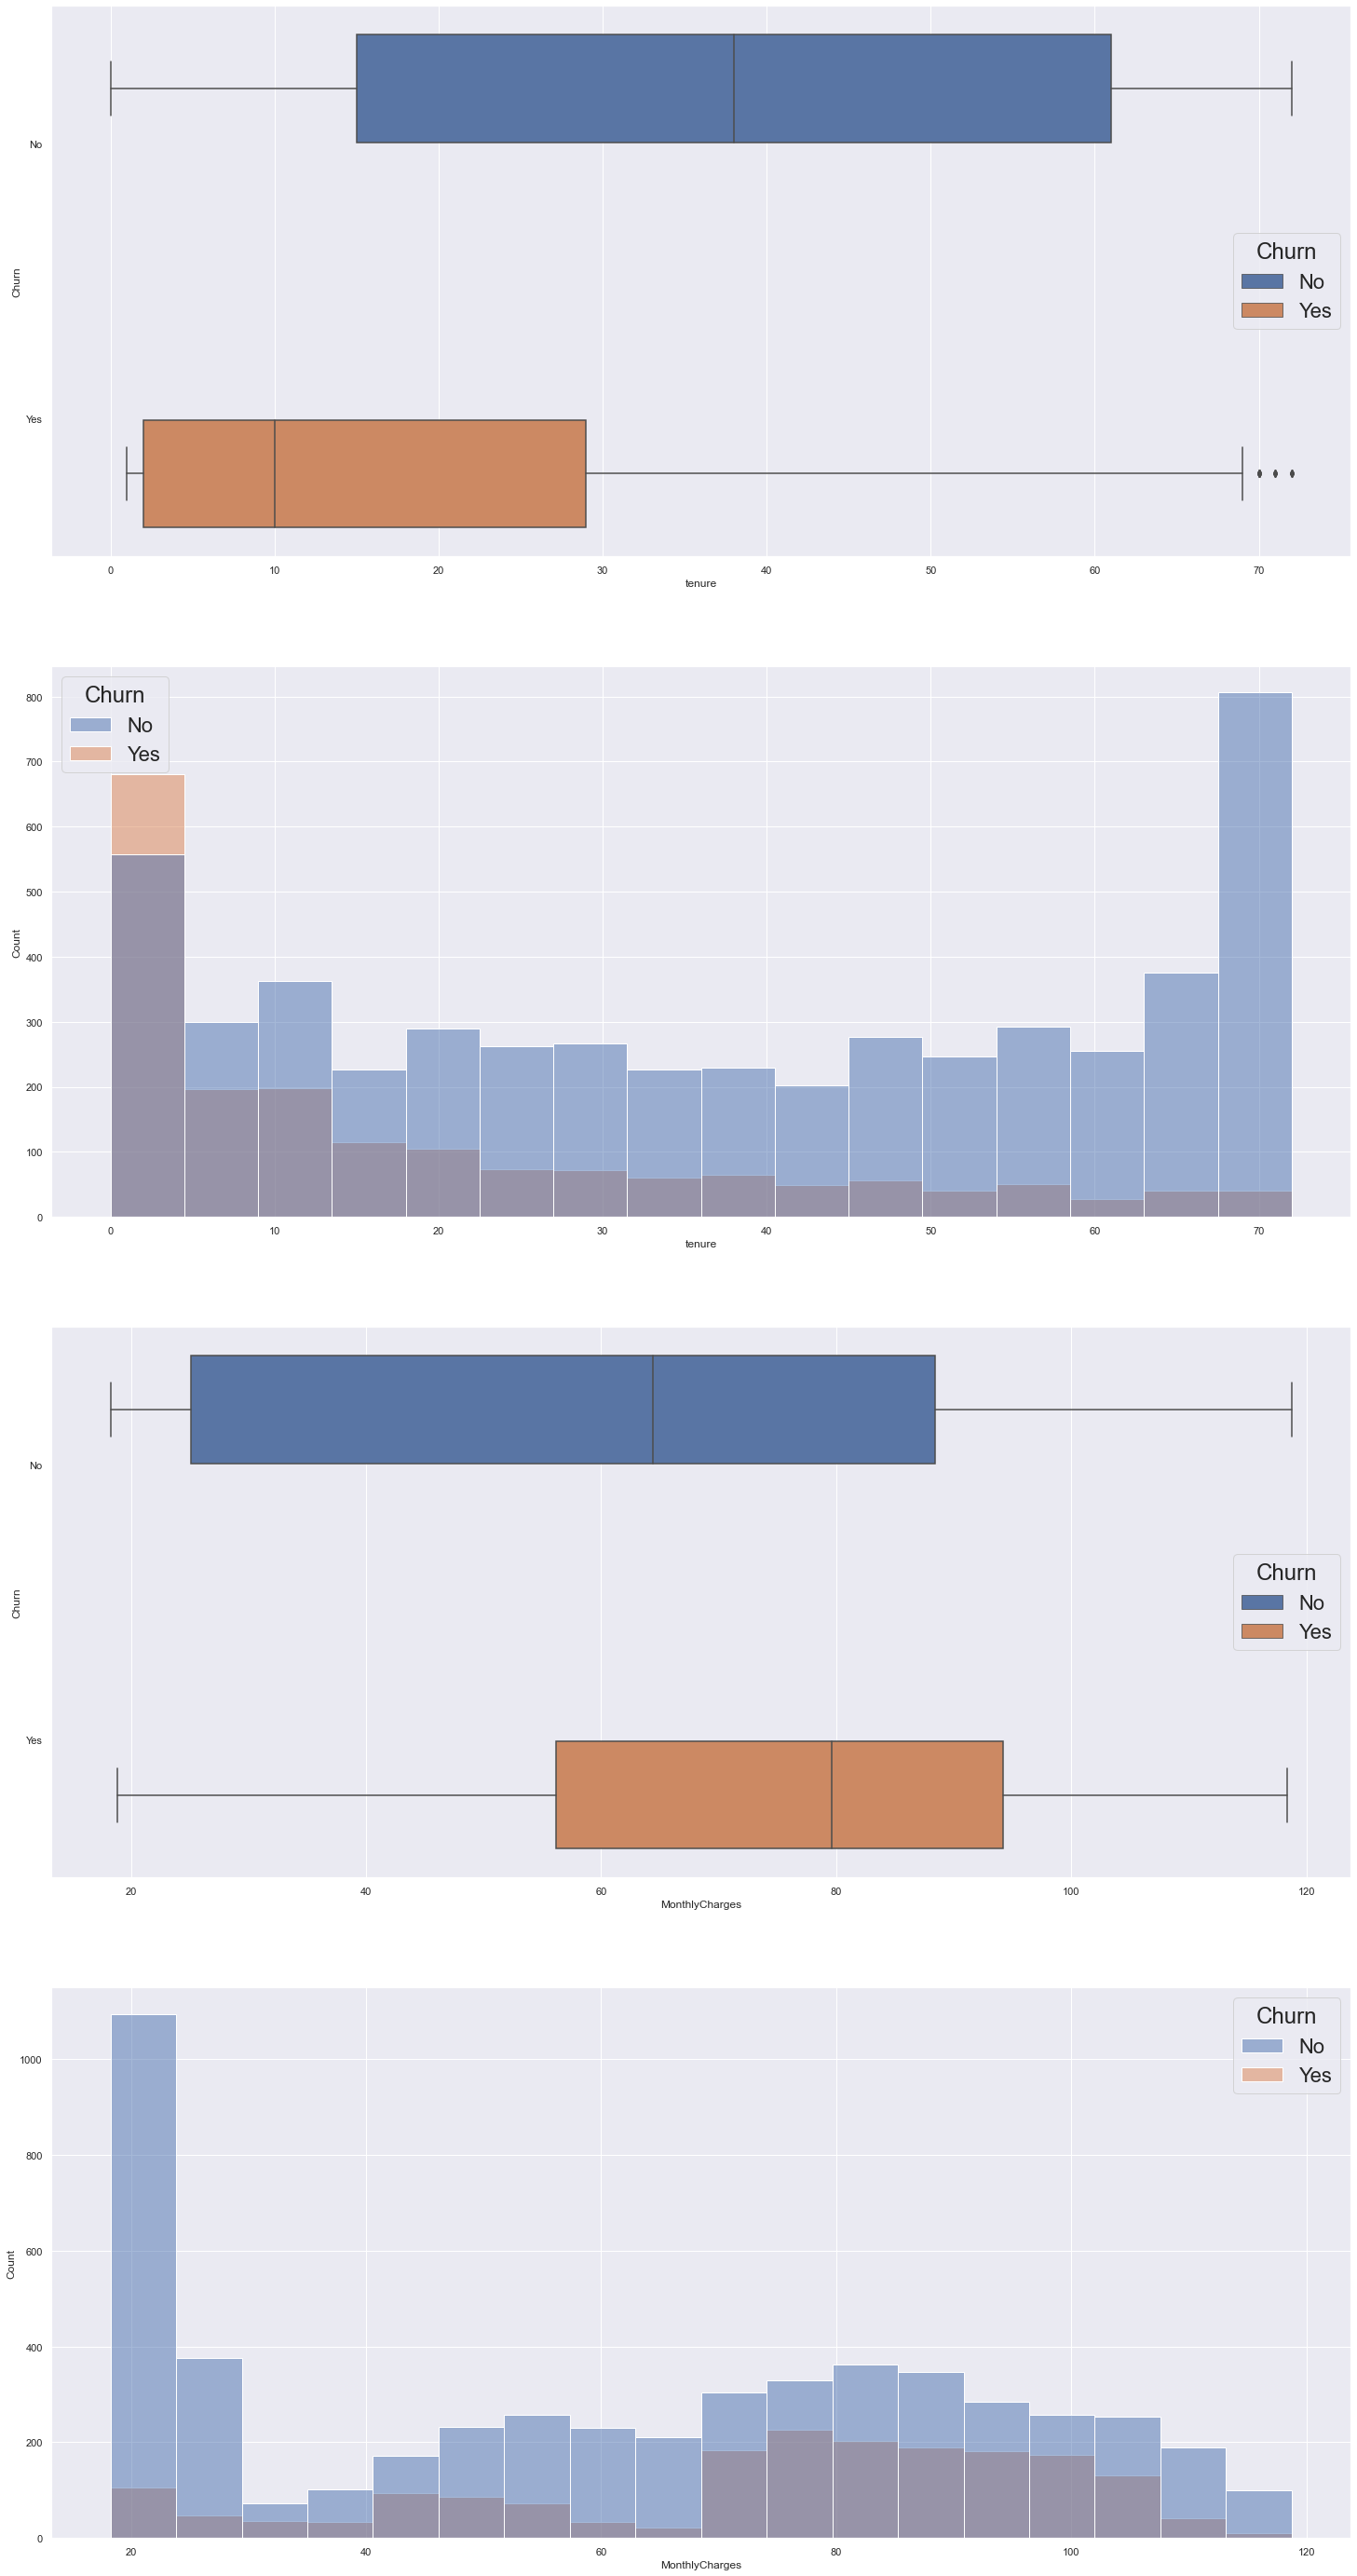

In [59]:
fig, ax = plt.subplots(4, figsize=(25, 50))
sns.set(font_scale=2)

g=sns.boxplot(data=df, x="tenure", y="Churn", ax=ax[0], hue="Churn")
g=sns.histplot(data=df, x="tenure", ax=ax[1], hue="Churn")


g=sns.boxplot(data=df, x="MonthlyCharges", y="Churn", ax=ax[2], hue="Churn")
g=sns.histplot(data=df, x="MonthlyCharges", ax=ax[3], hue="Churn")


#g=sns.boxplot(data=df, x="TotalCharges", y="Churn", ax=ax[4], hue="Churn")
#g=sns.histplot(data=df, x="TotalCharges", ax=ax[5], hue="Churn")

In [60]:
df_months=df.groupby(by =['tenure_month_group','Churn'])['MonthlyCharges'].count().to_frame().reset_index()



fig = px.bar(df_months, x='tenure_month_group', y='MonthlyCharges',color="Churn",barmode="group",
             
             )
fig.update_layout(title_text='Customer Churn  by Month Group',title_x=0.5)
fig.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

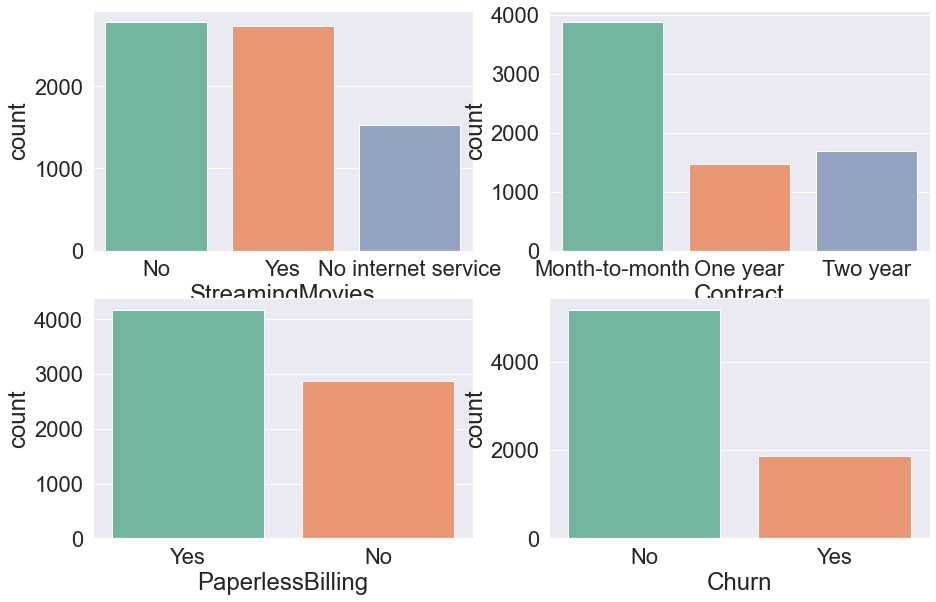

In [61]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', palette = 'Set2', data = df)

<AxesSubplot:xlabel='tenure'>

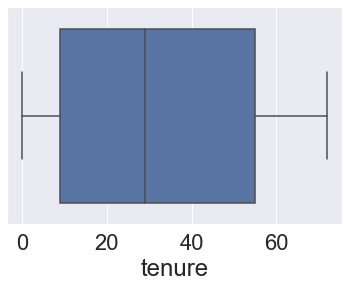

In [62]:
sns.boxplot(x=df["tenure"])

In [63]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [64]:
df.Churn.replace({"Yes":1, "No":0}, inplace = True)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

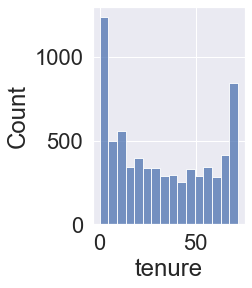

In [65]:
plt.subplot(1,2,1)
sns.histplot(df['tenure'], kde = False)


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

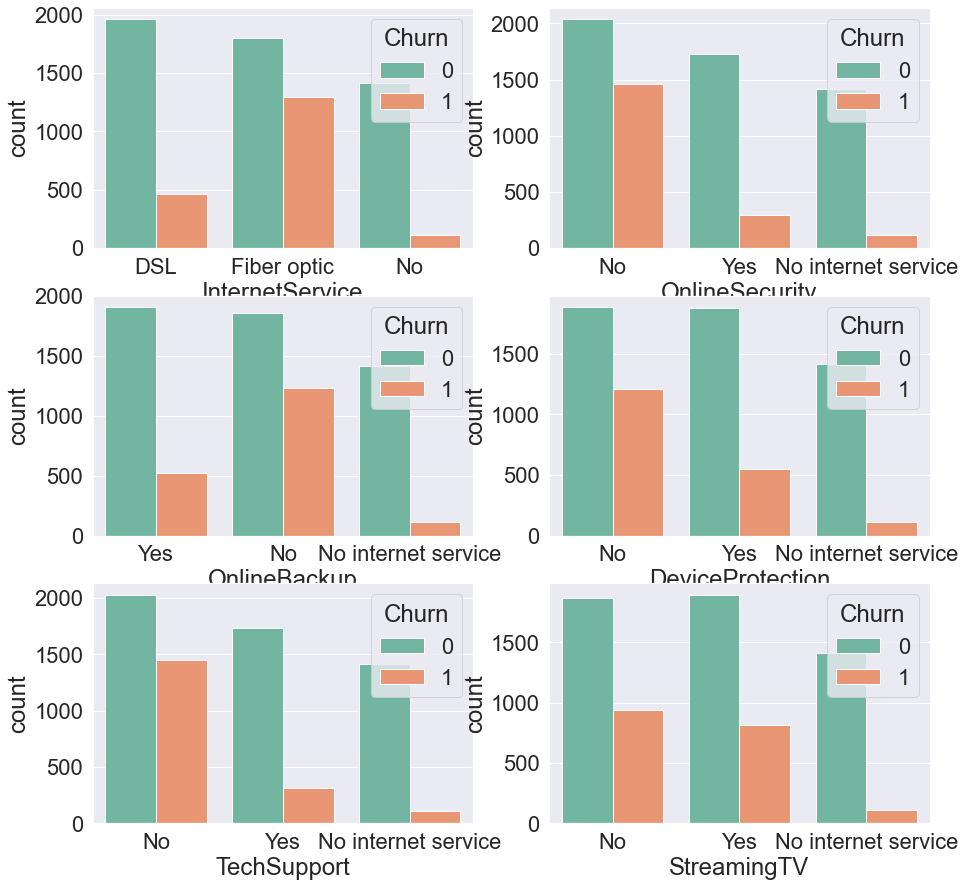

In [66]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', hue = 'Churn', palette = 'Set2', data = df)

Partner No         3641

In [67]:
# Replace churn string values with numeric binary values
df.Churn.replace({"Yes":1, "No":0}, inplace = True)
# Utilize pandas dummy variable function to create dummy variable series for categorical data
dummy_df = pd.get_dummies(df)
dummy_df.to_csv('d.csv')
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 13626 entries, SeniorCitizen to tenure_month_group_Above 60 months
dtypes: float64(1), int64(4), uint8(13621)
memory usage: 91.8 MB


## Pre-Processing Data for Regression

In [68]:
# Establish our target feature, churn, as our y feature
y = dummy_df.Churn.values
# Drop our target feature from our features dataframe
X = dummy_df.drop('Churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

## Scaling our Data

In [69]:
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols

## Train Test Split


In [70]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 25% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

## Logistic Regression

In [71]:

# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

#reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
#models, predictions = reg.fit(X_train, X_test, y_train, y_test)

#print(models)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [72]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [73]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    5282
dtype: int64
----------------------------------
0    1.0
dtype: float64


In [74]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1155  140]
 [ 222  244]]


In [75]:
def print_metrics(y_train, y_hat_train, y_test, y_hat_test):
    print('Training Metrics:')
    print(f'Training Precision: ', round(precision_score(y_train, y_hat_train), 2))
    print(f'Training Recall: ', round(recall_score(y_train, y_hat_train), 2))
    print(f'Training Accuracy: ', round(accuracy_score(y_train, y_hat_train), 2))
    print(f'Training F1-Score: ', round(f1_score(y_train, y_hat_train), 2))
    print('\n')
    print(f'Testing Metrics:')
    print(f'Testing Precision: ', round(precision_score(y_test, y_hat_test),2))
    print(f'Testing Recall: ', round(recall_score(y_test, y_hat_test),2))
    print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_hat_test),2))
    print(f'Testing F1-Score: ', round(f1_score(y_test, y_hat_test),2))

In [76]:
# Print 4 main logistic model metrics for training and test sets (Precision, Recall, Accuracy, F1)
print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Training Metrics:
Training Precision:  1.0
Training Recall:  1.0
Training Accuracy:  1.0
Training F1-Score:  1.0


Testing Metrics:
Testing Precision:  0.64
Testing Recall:  0.52
Testing Accuracy:  0.79
Testing F1-Score:  0.57


In [77]:
def print_metric_comparisons(X, y):
    
    # Create an empty list for each of the 4 classification metrics (Precision/Recall/Accuracy/F1-Score)
    training_precision = []
    testing_precision = []
    training_recall = []
    testing_recall = []
    training_accuracy = []
    testing_accuracy = []
    training_f1 = []
    testing_f1 = []
    
    # Iterate through a range of test_sizes to use for our logistic regression, using same parameters as our first logistic regression in our notebook. Append each respective result metric to its respective list.
    for i in range(10, 95):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0, random_state = 33)
        logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
        model_log = logreg.fit(X_train, y_train)
        y_hat_test = logreg.predict(X_test)
        y_hat_train = logreg.predict(X_train)

        training_precision.append(precision_score(y_train, y_hat_train))
        testing_precision.append(precision_score(y_test, y_hat_test))
        training_recall.append(recall_score(y_train, y_hat_train))
        testing_recall.append(recall_score(y_test, y_hat_test))
        training_accuracy.append(accuracy_score(y_train, y_hat_train))
        testing_accuracy.append(accuracy_score(y_test, y_hat_test))
        training_f1.append(f1_score(y_train, y_hat_train))
        testing_f1.append(f1_score(y_test, y_hat_test))
        
    # Use subplots to create a scatter plot of each of the 4 metrics. 
    plt.figure(figsize = (20, 10))
    plt.subplot(221)
    plt.title('Precision Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training precision list
    plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
    # Scatte4r plot test precision list
    plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(222)
    plt.title('Recall Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training recall list
    plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
    # Scatter plot test recall list
    plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(223)
    plt.title('Accuracy Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training accuracy list
    plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
    # Scatter plot test accuracy list
    plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(224)
    plt.title('F1 Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training f1-score list
    plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
    # Scatter plot testing f1-score list
    plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.tight_layout()

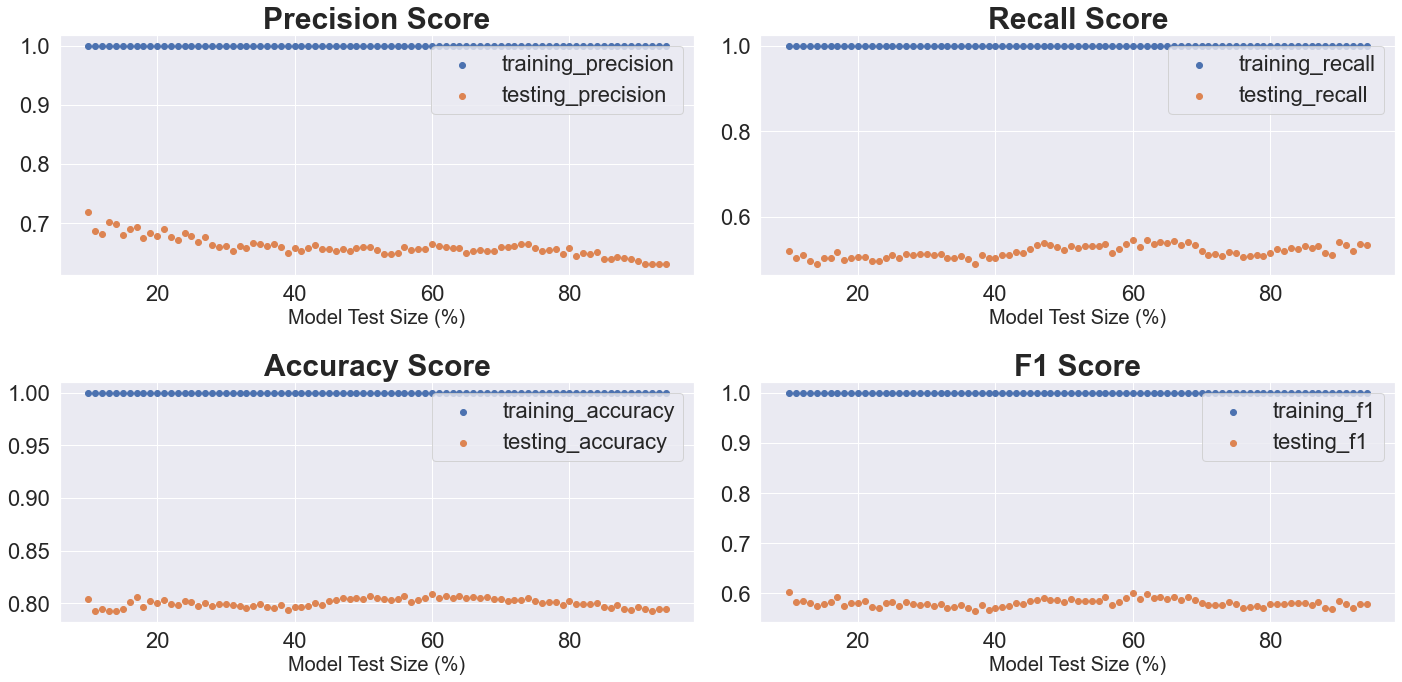

In [78]:
print_metric_comparisons(X, y)

## Peceptron

In [79]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
mlp.fit(X_train, y_train)

c:\Users\F5480264\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPRegressor(alpha=0.001, hidden_layer_sizes=50, learning_rate='adaptive',
             solver='lbfgs')

In [80]:
y_hat_train2 = mlp.predict(X_train)
y_hat_test2 = mlp.predict(X_test)

In [81]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train2)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.004917    1
0.108104    1
0.001839    1
0.011785    1
0.004890    1
           ..
0.001252    1
0.016487    1
0.010256    1
0.003484    1
0.004514    1
Length: 5282, dtype: int64
----------------------------------
0.004917    0.000189
0.108104    0.000189
0.001839    0.000189
0.011785    0.000189
0.004890    0.000189
              ...   
0.001252    0.000189
0.016487    0.000189
0.010256    0.000189
0.003484    0.000189
0.004514    0.000189
Length: 5282, dtype: float64


## CatBoostRegressor


In [82]:
import catboost as ctb
# define model
cat = ctb.CatBoostRegressor()
cat.fit(X_train, y_train)


Learning rate set to 0.053258
0:	learn: 0.4352107	total: 214ms	remaining: 3m 33s
1:	learn: 0.4292335	total: 283ms	remaining: 2m 21s
2:	learn: 0.4237214	total: 358ms	remaining: 1m 58s
3:	learn: 0.4187373	total: 435ms	remaining: 1m 48s
4:	learn: 0.4141264	total: 513ms	remaining: 1m 42s
5:	learn: 0.4102372	total: 620ms	remaining: 1m 42s
6:	learn: 0.4069516	total: 685ms	remaining: 1m 37s
7:	learn: 0.4033192	total: 751ms	remaining: 1m 33s
8:	learn: 0.4001678	total: 841ms	remaining: 1m 32s
9:	learn: 0.3969944	total: 948ms	remaining: 1m 33s
10:	learn: 0.3939326	total: 1.04s	remaining: 1m 33s
11:	learn: 0.3911068	total: 1.12s	remaining: 1m 32s
12:	learn: 0.3887150	total: 1.21s	remaining: 1m 31s
13:	learn: 0.3864320	total: 1.29s	remaining: 1m 31s
14:	learn: 0.3843373	total: 1.38s	remaining: 1m 30s
15:	learn: 0.3826398	total: 1.46s	remaining: 1m 29s
16:	learn: 0.3810693	total: 1.56s	remaining: 1m 30s
17:	learn: 0.3795420	total: 1.66s	remaining: 1m 30s
18:	learn: 0.3778566	total: 1.76s	remaining:

In [83]:
y_hat_train3 = cat.predict(X_train)
y_hat_test3 = cat.predict(X_test)

In [84]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train3)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.329837    5
0.159935    5
0.078404    5
0.009646    4
0.338953    4
           ..
0.112720    1
0.597691    1
0.165406    1
0.016955    1
0.077965    1
Length: 5078, dtype: int64
----------------------------------
0.329837    0.000947
0.159935    0.000947
0.078404    0.000947
0.009646    0.000757
0.338953    0.000757
              ...   
0.112720    0.000189
0.597691    0.000189
0.165406    0.000189
0.016955    0.000189
0.077965    0.000189
Length: 5078, dtype: float64


## Random Forest

In [85]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
y_hat_train4 = regr.predict(X_train)
y_hat_test4 = regr.predict(X_test)

In [87]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train4)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.00    2620
0.01     239
0.02     148
0.03      97
0.04      68
        ... 
0.44       2
0.51       1
0.45       1
0.46       1
0.43       1
Length: 82, dtype: int64
----------------------------------
0.00    0.496024
0.01    0.045248
0.02    0.028020
0.03    0.018364
0.04    0.012874
          ...   
0.44    0.000379
0.51    0.000189
0.45    0.000189
0.46    0.000189
0.43    0.000189
Length: 82, dtype: float64


## ExtraTreesRegressor

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
# define model
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

ExtraTreesRegressor()

In [89]:
y_hat_train5 = etr.predict(X_train)
y_hat_test5 = etr.predict(X_test)

In [90]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train5)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.0    5282
dtype: int64
----------------------------------
0.0    1.0
dtype: float64
